In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [153]:
data=pd.read_csv('/home/mllab/Downloads/Iris.csv')
data=data.sample(frac=1)

In [154]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
...,...,...,...,...,...,...
101,102,5.8,2.7,5.1,1.9,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor


<Axes: >

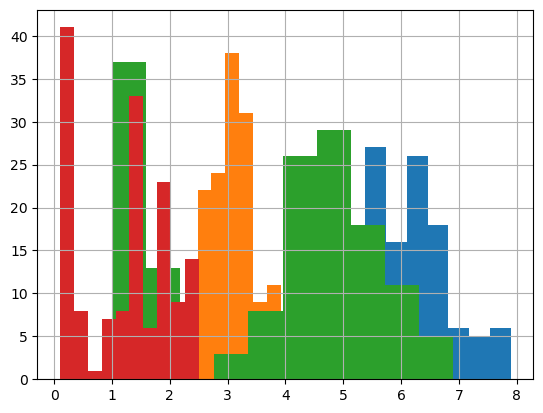

In [160]:
data['SepalLengthCm'].hist()
data['SepalWidthCm'].hist()
data['PetalLengthCm'].hist()
data['PetalWidthCm'].hist()

<Axes: >

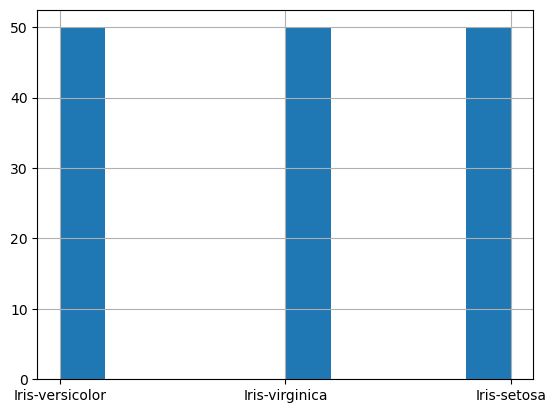

In [158]:
data['Species'].hist()

In [161]:
train_ratio=0.80
samplesize=int(train_ratio*150)
train_data=data[0:samplesize]
test_data=data[samplesize:]

In [162]:
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
...,...,...,...,...,...,...
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
132,133,6.4,2.8,5.6,2.2,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa


In [163]:
train_data=train_data.drop("Id",axis=1)
test_data=test_data.drop("Id",axis=1)

In [164]:
y_train=train_data['Species'].values
y_test=test_data['Species'].values

In [165]:
train_data=train_data.drop("Species",axis=1)
test_data=test_data.drop("Species",axis=1)
train_data=train_data.values
test_data=test_data.values

In [166]:
train_data=train_data.T
test_data=test_data.T

In [167]:
def conv(y_act):
    ar=[]
    for i in range(len(y_act)):
        if(y_act[i]=="Iris-setosa"):
            ar.append(0)
        elif(y_act[i]=="Iris-versicolor"):
            ar.append(0)
        else:
            ar.append(1)
    Y=np.array(ar)
    return Y

In [168]:
Y_train=conv(y_train)
Y_test=conv(y_test)

In [184]:
def model(X,Y,alpha,iterations):
    W=np.zeros(X.shape[0])
    b=0
    m=X.shape[1]
    cost_list=[]
    for i in range(iterations):
        
        
        # a is predicted value
        y=np.dot(W.T,X)+b
        a=sigmoid(y)
        
        # calculating cost
        cost=-(1/m)*np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))
        cost_list.append(cost)
        
        #computing derivatives with respect to 
        dw=np.dot(a-Y,X.T)
        db=np.sum(a-Y)
        
        #gradient descent
        W=W-alpha*dw
        b=b-alpha*db
    return W,b,cost_list

In [170]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [190]:
iterations=5000
alpha=0.001
W,b,cost_list=model(train_data,Y_train,alpha,iterations)
for i in range(0,iterations,10):
    print(f"cost at iteration {i}:{cost_list[i]}")

cost at iteration 0:0.6931471805599453
cost at iteration 10:0.500712005569168
cost at iteration 20:0.4264440891238364
cost at iteration 30:0.386360972826738
cost at iteration 40:0.36004141869341455
cost at iteration 50:0.34068795395661894
cost at iteration 60:0.32541273173581675
cost at iteration 70:0.31278015354682165
cost at iteration 80:0.30199118137941683
cost at iteration 90:0.2925618353722429
cost at iteration 100:0.2841791037231435
cost at iteration 110:0.27662966744333073
cost at iteration 120:0.26976179276741946
cost at iteration 130:0.26346363841183856
cost at iteration 140:0.2576502530021787
cost at iteration 150:0.25225543684978097
cost at iteration 160:0.24722645706603666
cost at iteration 170:0.24252050448408827
cost at iteration 180:0.2381022510755148
cost at iteration 190:0.23394212387102814
cost at iteration 200:0.23001505790800322
cost at iteration 210:0.2262995770941429
cost at iteration 220:0.22277710436829212
cost at iteration 230:0.21943143532088188
cost at iterat

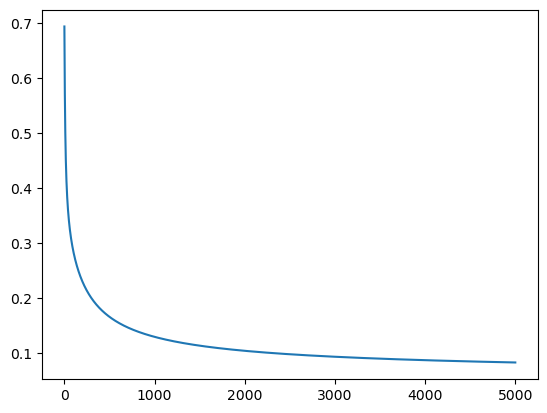

In [188]:
plt.plot(np.arange(iterations),cost_list)
plt.show()

In [181]:
Y_test.shape

(30,)

In [173]:
import sklearn.metrics as sk

In [174]:
a=sigmoid(np.dot(W.T,test_data)+b)
for i in range(len(a)):
    if(a[i]>=0.5):
        a[i]=1
    else:
        a[i]=0

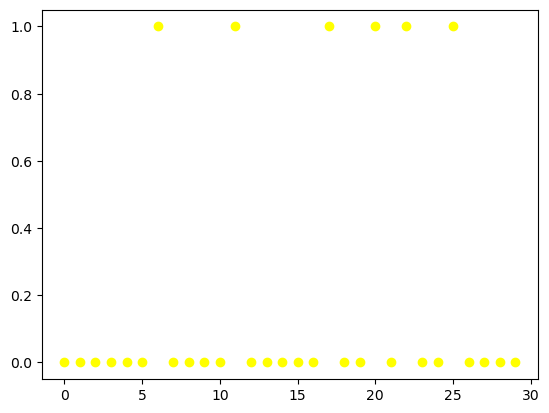

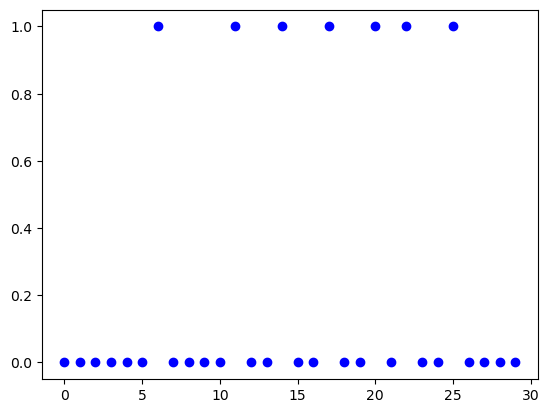

In [183]:
plt.scatter(np.arange(Y_test.shape[0]),Y_test,color='yellow')
plt.show()
plt.scatter(np.arange(Y_test.shape[0]),a,color='blue')
plt.show()

In [179]:
fpr,tpr,_=sk.roc_curve(Y_test,a)
roc_auc=sk.auc(fpr,tpr)

print(f"accuracy score:{sk.accuracy_score(Y_test,a)}")
print(f"precision score:{sk.precision_score(Y_test,a)}")
print(f"f1 score:{sk.f1_score(Y_test,a)}")
print(f"AUC_ROC score:{roc_auc}")

accuracy score:0.9666666666666667
precision score:0.8571428571428571
f1 score:0.923076923076923
AUC_ROC score:0.9791666666666667


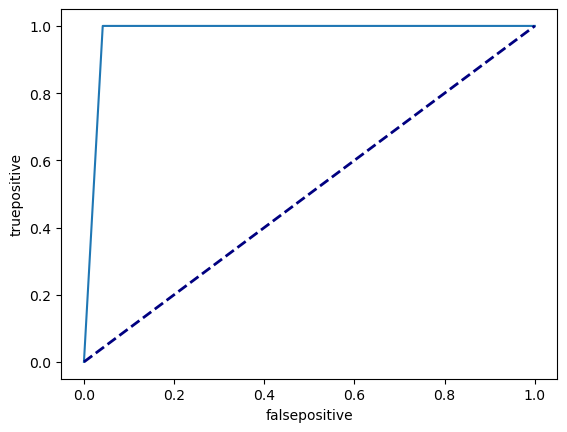

In [180]:


plt.plot(fpr,tpr)
plt.xlabel('falsepositive')
plt.ylabel('truepositive')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.show()


In [101]:
dir(sk)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fb

In [148]:
sk.precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>